# Link github:

https://github.com/npqd/P4DS_FinalProject.git

---

# Import thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

---

# Thu thập dữ liệu

### Mô tả cơ bản về dữ liệu

- Dữ liệu của hơn 40,000 trận đấu bóng đá quốc tế từ 1872-2019
- Tên các quốc gia theo lục địa
- Tên khác/ cũ của các quốc gia 

### Mục đích chọn dữ liệu

- Bóng đá trước giờ vẫn luôn là môn thể thao vua và luôn được mọi người quan tâm nhiều nhất. Qua dữ liệu đã có, ta có thể biết được tình hình phát triển bóng đá của các quốc gia, sự thay đổi về vị thế bóng đá của các nước qua các năm. Ngoài ra thông qua lịch sử đối đầu, chúng ta có thể dự đoán được phần nào các kết quả trong tương lai
- Data tên quốc gia theo lục địa để so sánh các quốc gia trong cùng khu vực bóng đá
- Data các tên gọi của quốc gia để quy ước tên các quốc gia trong dữ liệu là tên hiện tại của quốc gia đó

### Mô tả chi tiết dữ liệu

- `result.csv` Dữ liệu chứa 42,899 kết quả của các trận đá bóng quốc tế từ năm 1872 đến 2019. Từ những giải đấu được tổ chức bởi FIFA World Cup đến những giải đấu châu lục cho đến cả những giải đấu giao hữu. Đây là dữ liệu của những trận bóng đá nam, không bao gồm những giải đấu như Olympic hoặc của những đội hình phụ hoặc U23... hoặc là các giải đấu trong nước.
- `country_continent` Phân nhóm các quốc gia theo tên các châu lục, các vùng của một châu lục
- `country_allname` [wiki_name](https://en.wikipedia.org/wiki/List_of_alternative_country_names) các tên gọi thay thế, hoặc tên gọi trong quá khứ của từng quốc gia

#### `result.csv`

- `date` - ngày diễn ra trận đấu
- `home_team` - tên của đội chủ nhà
- `away_team` - tên của đội khách
- `home_score` - số bàn thắng đội chủ nhà ghi được bao gồm thời gian thi đấu chính thức và hiệp phụ, không tính loạt luân lưu
- `away_score` - số bàn thắng đội khách ghi được bao gồm thời gian thi đấu chính thức và hiệp phụ, không tính loạt luân lưu
- `tournament` - tên của giải đấu
- `city` - tên của thành phố trận đấu diễn ra
- `country` - tên của quốc gia mà trận đấu diễn ra
- `neutral` - cột TRUE/FALSE , nếu được tỏ trức ở một sân trung lập thì trả về giá trị TRUE

* **Lưu ý:**
    - `home_team` và `away_team` là tên hiện tại của đội. Ví dụ năm 1882, tên đội `Ireland` đá với `England` thì trong data này sẽ được gọi là `Northern Ireland` bởi vì đây là tên hiện tại của đội tuyển `Ireland` năm 1882. Việc quy ước này để có thể dễ dàng lấy thống kê
    - `country` sẽ là tên của quốc gia lúc diễn ra trận đấu. Vào những năm 1950, `Ghana` tuy đá ở `Gold Coast` nhưng vẫn là đội chủ nhà do cột `neutral` trả về giá trị FALSE


#### `country_continent.csv`

-   `Country` : Tên quốc gia, lãnh thổ theo FIFA
-   `Code`: Mã của quốc gia theo FIFA
-   `Continent`: Tên lục địa

### Nguồn thu thập dữ liệu

[result](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017)

[country_continent](https://en.wikipedia.org/wiki/Geography_of_association_football)

<!-- [country_allname](https://github.com/aaronschiff/country-names/blob/master/country-names-cross-ref.csv) -->

---

# Khám phá dữ liệu

### Đọc dữ liệu

Đọc dữ liệu các trận đấu vào `df_match`

In [2]:
df_match  = pd.read_csv('results.csv')
#TEST
df_match.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
11181,1979-11-13,Malawi,Tanzania,1,1,CECAFA Cup,Mombasa,Kenya,True
42913,2021-11-11,Ethiopia,Ghana,1,1,FIFA World Cup qualification,Johannesburg,South Africa,True
28755,2006-09-27,Venezuela,Uruguay,1,0,Friendly,Maracaibo,Venezuela,False
5734,1964-11-04,Algeria,Russia,2,2,Friendly,Algiers,Algeria,False
14559,1987-02-27,Dominican Republic,Panama,1,2,Friendly,Santo Domingo,Dominican Republic,False


Đọc dữ liệu quốc gia theo lục địa vào `df_continent`

In [3]:
df_continent = pd.read_csv('country_continent.csv')
df_continent = df_continent.set_index(df_continent.columns[0])
#TEST
df_continent.sample(5)

,Code,Country,Continent
Index,,,
171,SVK,Slovakia,Europe
152,PUR,Puerto Rico,"North America, Central America and the Caribbean"
89,IND,India,Asia
131,NEP,Nepal,Asia
109,LBY,Libya,Africa


### Tiền xử lý

- Để chắc chắn rằng, những quốc gia chúng ta đang tìm hiểu là những quốc gia hiện tại được công nhận bởi FIFA, vì vậy ta sẽ chỉ giữ những dữ liệu của những trận đấu mà và `home_team` và `away_team` đều là đội bóng có tên trong danh sách FIFA bây giờ.
- Ta phải làm vậy vì giờ bóng đá quốc tế được sắp xếp theo bảng xếp hạng của FIFA, nên nếu không có tên trong FIFA thì các trận đấu gần như chẳng được tính điểm

In [4]:
df_match= df_match[df_match['home_team'].isin(df_continent['Country']) & \
     df_match['away_team'].isin(df_continent['Country'])]
df_match.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40024,2018-06-15,Portugal,Spain,3,3,FIFA World Cup,Sochi,Russia,True
8105,1972-01-01,Iraq,Egypt,0,0,Palestine Cup,Baghdad,Iraq,False
13863,1985-06-01,Hong Kong,Macau,2,0,Friendly,Siu Sai Wan,Hong Kong,False
14642,1987-05-19,Switzerland,Israel,1,0,Friendly,Aarau,Switzerland,False
28852,2006-10-11,Russia,Estonia,2,0,UEFA Euro qualification,St. Petersburg,Russia,False


### Dữ liệu có bao nhiêu dòng và cột ?

Tiếp theo, ta tính số dòng và số cột của DataFrame `df_match` và `df_continent`, lưu vào biến `match_rows`,`match_cols` và `continent_rows`,`continent_cols`.

In [5]:
match_rows,match_cols = df_match.shape
print('number rows of match: ',match_rows)
print('number cols of match: ',match_cols)

number rows of match:  39480
number cols of match:  9


In [6]:
continent_rows,continent_cols = df_continent.shape
print('number rows of continent: ',continent_rows)
print('number cols of continent: ',continent_cols)

number rows of continent:  211
number cols of continent:  3


### Mỗi dòng có ý nghĩa gì? Có vấn đề gì các dòng có ý nghĩa khác nhau không ?

`df_match`

- Mỗi dòng cho biết thông tin về trận đấu bóng đá giữa 2 nước, thông qua quan sát sơ bộ thì có vẻ không có vấn đề gì, mỗi dòng khác nhau thể hiện thông tin khác nhau về mỗi trận đấu.

`df_continent`

Mỗi dòng cho biết thông tin về tên, mã code và khu vực của từng quốc gia theo FIFA, có vẻ như không có vấn đề gì

### Dữ liệu có các dòng bị lặp không ? 

In [7]:
np.all([df_match.duplicated(keep=False)])

False

- Có vẻ như không có dòng dữ liệu nào bị lặp lại thông tin cả.

### Mỗi cột có ý nghĩa gì?

- Như đã mô tả ở phần Mô tả chi tiết dữ liệu, ta đã hiểu rõ về ý nghĩa của các cột
- Để tránh trường hợp bạn quên thì ta sẽ đọc lại thông tin của các cột thông qua 2 file text, `mean_result.csv` và `mean_continent.csv`

Thông tin `df_match`

In [8]:
match_cols_meaning = pd.read_csv('mean_result.csv')
pd.set_option('display.max_colwidth',None)
match_cols_meaning

,column_name,mean
0,date,ngày diễn ra trận đấu
1,home_team,tên của đội chủ nhà
2,away_team,tên của đội khách
3,home_score,số bàn thắng đội chủ nhà ghi được bao gồm thời gian thi đấu chính thức và hiệp phụ - không tính loạt luân lưu
4,away_score,số bàn thắng đội khách ghi được bao gồm thời gian thi đấu chính thức và hiệp phụ - không tính loạt luân lưu
5,tournament,tên của giải đấu
6,city,tên của thành phố trận đấu diễn ra
7,country,tên của quốc gia mà trận đấu diễn ra
8,neutral,cột TRUE/FALSE nếu được tỏ trức ở một sân trung lập thì trả về giá trị TRUE


Thông tin `df_continent`

In [9]:
continent_cols_meaning = pd.read_csv('mean_continent.csv')
pd.set_option('display.max_colwidth',None)
continent_cols_meaning

,column_name,mean
0,Country,Tên quốc gia - lãnh thổ theo FIFA
1,Code,Mã của quốc gia theo FIFA
2,Continent,Tên lục địa


### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cần phải thay đổi hay không?

- Thông tin kiểu dữ liệu `df_match`

In [10]:
df_match.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

có 3 cột thể hiện dữ liệu numneric là `date` `home_score` và `away_score`. Nhưng ở đây `date` vẫn thể hiện kiểu dữ liệu là `object`, có vẻ như ta sẽ thay đổi kiểu dữ liệu cột `date` về dạng `datetime`

In [11]:
df_match['date'] = pd.to_datetime(df_match['date'], format="%Y-%m-%d")
df_match.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

- Có vẻ dữ liệu cột `date` không có vấn đề gì cả, vì khi chuyển qua datetime chương trình không báo lỗi

- Thông tin kiểu dữ liệu `df_continent`

In [12]:
df_continent.dtypes

Code         object
Country      object
Continent    object
dtype: object

Vì dữ liệu của `df_continent` được biểu diễn hoàn toàn dưới dạng chuỗi nên có vẻ không có gì cần phải thay đổi

### Với mỗi cột có kiểu dữ liệu dạng số, các giá trị được phân bố như thế nào?

#### Trước khi tìm hiểu kĩ về các dữ liệu dạng số, có giá trị nào không hợp lệ trong mỗi cột không?

1. Trước tiên ta kiểm tra cột `date`. Trong đó ta phải chắc chắn rằng không có trận đấu nào chưa được đá mà đã có kết quả, tức là thời gian lớn hơn thời điểm hiện tai mà có kết quả


In [13]:
np.all(df_match['date'] > np.datetime64(dt.date.today()))

False

- Vậy là không có dữ liệu nào của cột `date` có dấu hiệu bất thường

2. Tiếp theo kiểm tra 2 cột `home_score` và `away_score` coi có giá trị nào bị âm không?

In [14]:
len(df_match[(df_match['home_score'] < 0) | (df_match['away_score'] < 0) ])

0

- Vậy là dữ liệu 2 cột `home_socre` và `away_score` không có giá trị nào bị âm

#### Quay lại bước khám phá dữ liệu

Ta sẽ tính một số thông tin sau của các cột dữ liệu dạng số:

- Số lượng các giá trị thiếu.
- Tỉ lệ % các giá trị thiếu (0->100).
- Giá trị min.
- Giá trị median.
- Giá trị max.

In [15]:

nume_col_info_df = pd.DataFrame()
for col in df_match.keys():
    if df_match[col].dtype in [np.int64, np.float64,'<M8[ns]'] :
        missing = df_match[col].isnull().sum()
        missing_percentage = round(df_match[col].isnull().sum() * 100 / len(df_match[col]),2)
        min_value = df_match[col].min()         
        median = df_match[col].median() 
        max_value = df_match[col].max()
        row_line = pd.Series([missing,missing_percentage, min_value,  median, max_value], 
                                index = ['num_missing','missing_percentage', 'min',  'median', 'max'])
        nume_col_info_df[col] = row_line
nume_col_info_df    

,date,home_score,away_score
num_missing,0,0.0,0.0
missing_percentage,0.0,0.0,0.0
min,1872-11-30 00:00:00,0.0,0.0
median,1999-04-28 00:00:00,1.0,1.0
max,2021-12-18 00:00:00,31.0,21.0


Mô hình hóa phân bố các giá trị số

Text(0.5, 1.0, 'number score away')

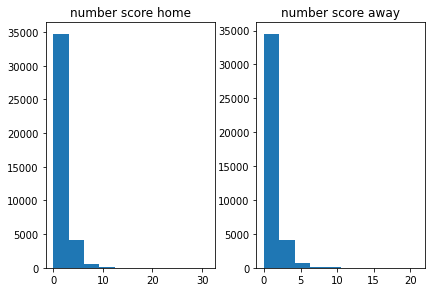

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.tight_layout()
ax1.hist(df_match.home_score);
ax1.set_title('number score home')
ax2.hist(df_match.away_score);
ax2.set_title('number score away')

In [17]:
df_match[['home_score','away_score']]

,home_score,away_score
0,0,0
1,4,2
2,2,1
3,2,2
4,3,0
...,...,...
43080,0,1
43081,1,0
43082,1,2
43083,0,1


In [18]:
# f = plt.figure(figsize=(8, 10))
# plt.matshow(df_match[['home_score','away_score']].corr(),fignum=f.number)
# plt.xticks(range(df_match.select_dtypes(['number']).shape[1]), df_match.select_dtypes(['number']).columns, fontsize=14, rotation=45)
# plt.yticks(range(df_match.select_dtypes(['number']).shape[1]), df_match.select_dtypes(['number']).columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16);


- Từ bảng trên, ta có thể max của `home_score` và `away_score` là 31 và 21 , có lẽ đây là những trận đấu vô cùng cởi mở từ các đội hoặc là những trận đấu một chiều, trình độ chênh lệch giữ hai đội quá lớn. min là 0.
- Nhìn vào đồ thị, ta hiểu được tại sao mean lại là 1
- Tương tự với `date` như đã tiền xử lý ở trên

     => Không có gì bất thường.

### Với các cột dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

Ta sẽ tính một số thông tin sau:

- Số lượng các giá trị thiếu.
- Tỉ lệ % các giá trị thiếu (0->100).
- Số lượng các giá trị các nhau (không xét giá trị thiếu).
- TỈ lệ % (0->100) của mỗi giá trị của cột được sắp xếp theo tỉ lệ % giảm dần (không xét giá trị thiếu).

In [19]:
#set colwidth whit row have too much info
pd.set_option('display.max_colwidth',100)

cate_col = ['home_team','away_team','tournament','city','country','neutral']

missing = []
missing_percentage=[]
num_values=[]
value_percentages=[]

for column in cate_col:
    missing.append(df_match[column].isnull().sum())
    missing_percentage.append((df_match[column].isnull().sum() * 100 / len(df_match)).round(3))
    temp = df_match[column].dropna()
    num_values.append(len(temp.unique()))
    value_percentages.append(((temp.value_counts(normalize=True)*100).round(1)).to_dict())
cate_col_info_df = pd.DataFrame([missing,missing_percentage,num_values,value_percentages],
                            index=['num_missing','missing_percentage','num_values','value_percentages'],
                            columns=cate_col)

cate_col_info_df


,home_team,away_team,tournament,city,country,neutral
num_missing,0,0,0,0,0,0
missing_percentage,0.0,0.0,0.0,0.0,0.0,0.0
num_values,209,209,117,1885,248,2
value_percentages,"{'Brazil': 1.4, 'Argentina': 1.4, 'Mexico': 1.3, 'England': 1.3, 'Germany': 1.3, 'Sweden': 1.2, ...","{'Uruguay': 1.4, 'Sweden': 1.3, 'England': 1.3, 'Paraguay': 1.2, 'Hungary': 1.1, 'Argentina': 1....","{'Friendly': 40.0, 'FIFA World Cup qualification': 19.4, 'UEFA Euro qualification': 6.1, 'Africa...","{'Kuala Lumpur': 1.5, 'Doha': 1.2, 'Bangkok': 1.0, 'London': 1.0, 'Budapest': 0.9, 'Montevideo':...","{'United States': 3.0, 'France': 1.8, 'Malaysia': 1.7, 'England': 1.5, 'Germany': 1.4, 'Qatar': ...","{False: 76.4, True: 23.6}"


Mô hình hóa phân bố các dữ liệu


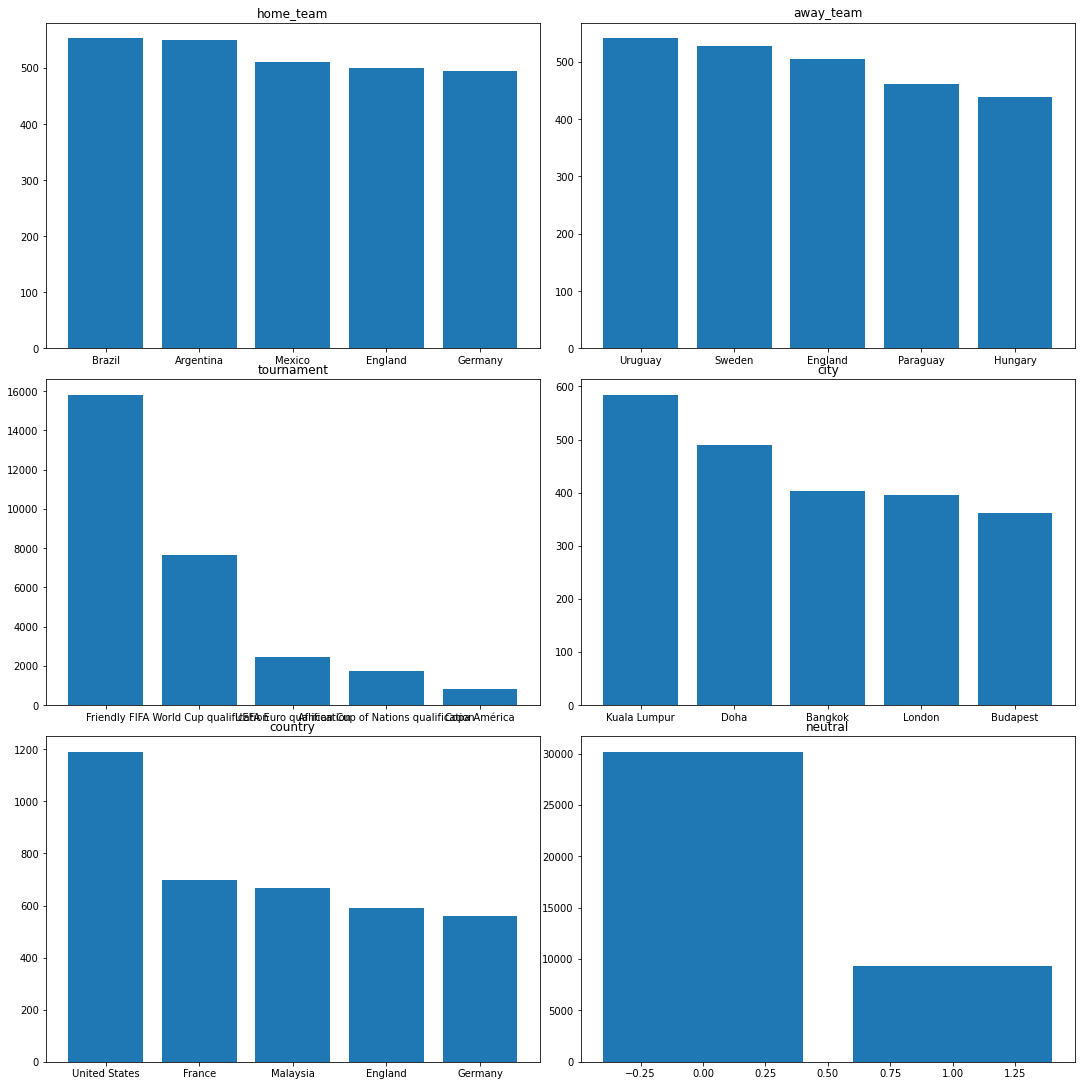

In [20]:
cate_col = ['home_team','away_team','tournament','city','country','neutral']

df_temp = df_match[cate_col]
fig, axs = plt.subplots(3,2)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.tight_layout(pad=1, w_pad=1, h_pad=1.0)
for i in range(0,3):
    for j in range(0,2):
        axs[i,j].bar(df_match[cate_col[i*2+j]].value_counts().head(5).index,\
            df_match[cate_col[i*2+j]].value_counts().head(5).values)
        axs[i,j].set_title(cate_col[i*2+j])


- Dữ liệu có vẻ không có gì bất thường, tỉ lệ các nước làm `home_team `và `away_team` khá tương đương, có sự chênh lệch này do ta đã xóa những trận đấu có chứa quốc gia không thuộc hệ thống của FIFA.
- Giao hữu là giải được tổ chức nhiều nhất trên thế giới nên nó chiếm tỉ lệ số trận cao hoàn toàn hợp lý
- Các giải đấu thường tổ chức ở một quốc gia trung lập nào nên tỉ lệ trận đấu sân trung lập nhiều hơn sân nhà là điều đương nhiên

---

# Đưa ra các câu hỏi cần trả lời

## 1. Đội bóng nào vĩ đại nhất thế giới? 

- Bóng đá là môn thể thao có lịch sử lâu đời, xuyên suốt lịch sử bóng đá, qua từng thời kì đêu có những đội thống trị bóng đá toàn thế giới. Vậy thì đội bóng nào mới là đội nổi bật nhất trong tất cả? Trả lời được câu hỏi này ta có thể biết được phần nào mức độ phát triển bóng đá của các nước trên thế giới, lựa chọn đội bóng hâm mộ dựa trên các thông số, cũng như hiểu được tại sao những đội bóng này lại được nhắc nhiều trên truyền thông đến vậy 
- Vậy một đội bóng vĩ đại là đội bóng như thế nào? Theo tôi đó là 
    - Đội bóng ghi được nhiều bàn thắng 
    - Đội bóng giành được nhiều chiến thắng 
    - Đội bóng tham gia nhiều trận đấu 
    
    => Đội có tỉ lệ thắng cao và tỉ lệ ghi bàn cao 

### Tiền xử lí + phân tích dữ liệu để trả lời câu hỏi

#### Trước khi đi sâu vào phân tích, ta sẽ tính kết quả của các trận đấu, đội thắng của các trận đấu 

Dùng `np.select` để có thể lọc ra cột `result` chứa kết quả là Tên đội thắng hoặc `Draw` nếu là hòa. Lưu kết quả vào `df_cau1` để tránh ảnh hưởng đến `df_match`

In [56]:
df_cau1 = df_match.copy()

condition = [(df_cau1['home_score']==df_cau1['away_score']),(df_cau1['home_score']>df_cau1['away_score']),(df_cau1['home_score']<df_cau1['away_score'])]
value=['Draw',df_cau1['home_team'],df_cau1['away_team']]
#phan loai theo dieu kien condition
df_cau1['result']=np.select(condition,value)
df_cau1.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland


### Quay lại các bước để trả lời câu hỏi

#### Đội bóng nào ghi được nhiều bàn thắng nhất?

##### Bước 1: Tính số bàn thắng khi ở home_team và away_team của các đội bóng

In [57]:
#tim so ban thang khi la home_team
df_home_score = df_cau1.groupby('home_team').sum()[['home_score']]
df_home_score = df_home_score.reset_index()
#tim so ban thang khi la away_team
df_away_score = df_cau1.groupby('away_team').sum()[['away_score']]
df_away_score = df_away_score.reset_index()

##### Bước 2: Gộp 2 dataframe ở trên để tạo ra `df_country_score` chứa kết quả sân nhà và sân khách của các đội bóng

In [58]:
#merge 2 df lại
df_country_score = pd.merge(df_home_score,df_away_score,left_on='home_team',right_on='away_team')
del df_country_score['away_team']
df_country_score.columns = ['country','home_score','away_score']
df_country_score.head()

,country,home_score,away_score
0,Afghanistan,52,70
1,Albania,201,117
2,Algeria,542,210
3,American Samoa,11,11
4,Andorra,33,23


##### Bước 3: tính tổng số bàn thắng của các đội vào cột `total_score`, sau đó sort df theo cột `total_score`

In [59]:
df_country_score['total_score'] = df_country_score['home_score'] +df_country_score['away_score']
df_country_score = df_country_score.sort_values(by=['total_score'],ascending=False)
df_country_score.head()

,country,home_score,away_score,total_score
60,England,1153,1061,2214
27,Brazil,1381,736,2117
73,Germany,1240,860,2100
180,Sweden,1134,873,2007
8,Argentina,1213,625,1838


- Có vẻ như nhờ lợi thế là nơi khởi nguồn của nền bóng đá hiện đại, thời gian diễn ra trận đấu đầu tiên sớm đã giúp cho `England` đứng đầu chỉ số bàn thắng ghi được

#### Đội bóng nào giành được nhiều chiến thắng nhất?

Gom nhóm `df_cau1` theo cột `result` rồi lưu số trận thắng của từng đội vào `df_country_win`

In [84]:
df_country_win = df_cau1.groupby('result').size()
#bo ket qua hoa
df_country_win = df_country_win.drop('Draw')

df_country_win = df_country_win.sort_values(ascending=False)
#chuyen ve df
df_country_win = df_country_win.reset_index()
df_country_win.columns = ['country','win_match']
df_country_win.head(5)

,country,win_match
0,Brazil,622
1,England,576
2,Germany,544
3,Argentina,532
4,Sweden,506


- Là đội bóng có nhiều World Cup nhất nên không bất ngờ nếu Brazil là đội đứng đầu

#### Đội bóng nào tham gia nhiều trận đấu nhất?

##### Tính tổng số trận đấu mà đội bóng tham gia với tư cách là `home_team` và `away_team`  lưu vào `df_country_match`

In [81]:
#tinh tong so tran
df_country_match = df_cau1.groupby('home_team').size() + df_cau1.groupby('away_team').size()
#chuyen ve dataframe
df_country_match = df_country_match.reset_index()
df_country_match.columns = ['country','match_played']
#sort
df_country_match = df_country_match.sort_values(by='match_played',ascending=False)
df_country_match.head()

,country,match_played
180,Sweden,1011
60,England,1005
8,Argentina,986
27,Brazil,966
73,Germany,929


- Khá bất ngờ khi Thụy Điển là nước tham gia nhiều trận đấu nhất

#### Cuối cùng tính tỉ lệ thắng và số bàn thắng trên trận của từng đội tuyển, tìm những đội tuyển tốt nhất

Bước 1: gộp 3 dataframe được tạo ở trên `df_country_score` , `df_country_match`, `df_country_win` lại thành `df_country_stats`

In [104]:
df_country_stats = pd.merge(df_country_score,df_country_win,on='country')
df_country_stats = df_country_stats.merge(df_country_match,on='country')
df_country_stats.head()

,country,home_score,away_score,total_score,win_match,match_played
0,England,1153,1061,2214,576,1005
1,Brazil,1381,736,2117,622,966
2,Germany,1240,860,2100,544,929
3,Sweden,1134,873,2007,506,1011
4,Argentina,1213,625,1838,532,986


Bước 2: Tính tỉ lệ thắng và số bàn trên trận của từng đội tuyển, lưu vào 2 cột `win_rate` và `score_per_game`. Sau đó sắp xếp theo `win_rate` và `score_per_game`

In [105]:
df_country_stats['win_rate'] = (df_country_stats['win_match'] / df_country_stats['match_played']).round(3)
df_country_stats['score_per_game'] = (df_country_stats['total_score'] / df_country_stats['match_played']).round(3)

#bo nhung cot khong can dung den nua
df_country_stats = df_country_stats[['country','total_score','match_played','win_rate','score_per_game']]
#sort
df_country_stats = df_country_stats.sort_values(by=['win_rate','score_per_game'],ascending=False)
df_country_stats.head()

,country,total_score,match_played,win_rate,score_per_game
1,Brazil,2117,966,0.644,2.192
11,Spain,1396,685,0.590,2.038
2,Germany,2100,929,0.586,2.260
0,England,2214,1005,0.573,2.203
37,Iran,947,505,0.558,1.875


- Có một số nước có tỉ lệ thắng và số bàn thắng một trận cao nhưng số trận đã đấu ít hơn so với top đầu, có lẽ ta nên xét những nước đã đá trên 800 trận đấu để công bằng hơn.

Bước 3: Xét các nước có số trận trên 800 và tỉ lệ thắng lớn hơn 0.4, lưu vào `df_best_country`

In [107]:
df_best_country = df_country_stats[ (df_country_stats['win_rate'] > 0.4) \
    & (df_country_stats['match_played'] > 800) ]
df_best_country.head()

,country,total_score,match_played,win_rate,score_per_game
1,Brazil,2117,966,0.644,2.192
2,Germany,2100,929,0.586,2.260
0,England,2214,1005,0.573,2.203
4,Argentina,1838,986,0.540,1.864
7,South Korea,1516,870,0.529,1.743


#### Vẽ đồ thị scatter biểu diễn tỉ lệ thắng và số bàn thắng của các đội bóng vĩ đại nhất lịch sử bóng đá

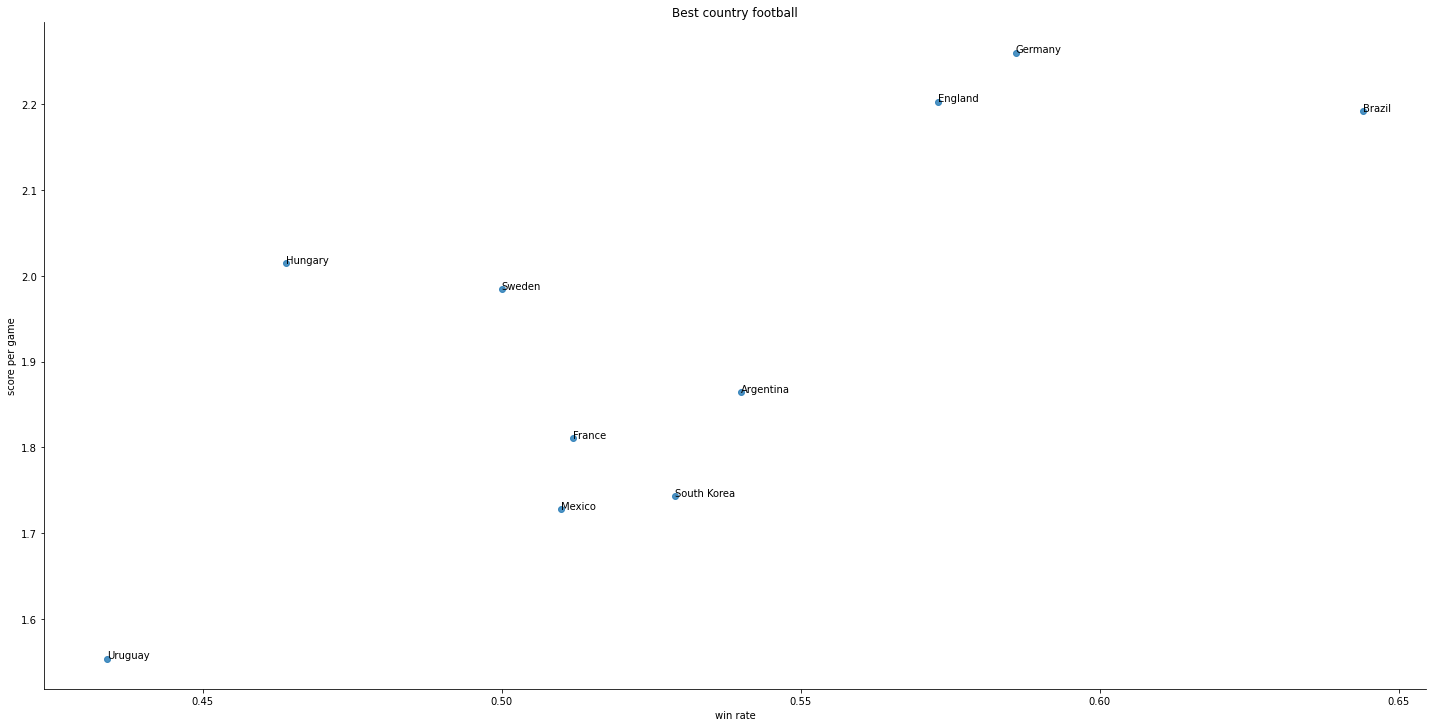

In [122]:
# sns.scatterplot(x=df_best_country['win_rate'], y =df_best_country['score_per_game'])
ax = sns.lmplot('win_rate', 'score_per_game',data = df_best_country,\
     fit_reg=False,height= 10,aspect =2 );

#cai dat thong tin bieu do
plt.title('Best country football');
plt.xlabel('win rate');
plt.ylabel('score per game');
#hien thi ten tung diem
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))
label_point(df_best_country['win_rate'],df_best_country['score_per_game'],df_best_country['country'],plt.gca())

Như vậy có thể thấy rằng:
- Brazil là nước có tỉ lệ thắng cao nhất, cũng như là top đầu số bàn ghi một trận.
- Đức là nước có số bàn thắng ghi được mỗi trận cao nhất, phù hợp với những người thích coi một trận đấu cống hiến
- Anh là nước có lịch sử bóng đá lâu đời, dành cho người thích về văn hóa bóng đá
- Có thể thấy những nước ở Châu Mỹ và Châu Âu phát triển bóng đá mạnh hơn những nơi còn lại

---

# Nhìn lại quá trình làm đồ án

### Học được những gì từ đồ án

### Những khó khăn khi thực hiện đồ án

---

# Tài liệu tham khảo

---